In [2]:
import spacy 
import en_core_web_sm
import en_vectors_web_lg
import re
from pprint import pprint
import collections
import numpy as np
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
nlp = spacy.load("en_core_web_sm")

In [4]:
vec = en_vectors_web_lg.load()


Total word vectors: 1070971


In [7]:
unique_words = list(set([word for sublist in [doc.split() for doc in all_files] for word in sublist]))

word_glove_vectors = np.array([vec(word).vector for word in unique_words])
pd.DataFrame(word_glove_vectors, index=unique_words)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
all,0.009978,-0.209950,-0.222450,-0.393130,0.104670,-0.029262,0.022740,0.343810,0.098002,2.48620,...,-0.537090,0.020617,-0.009001,-0.142390,-0.078708,-0.148640,-0.271200,-0.287570,0.229350,0.227520
programs,-0.177460,-0.167620,0.347610,-0.230050,-0.217660,0.267660,-0.214660,-0.265220,0.492270,2.76110,...,0.203650,0.075973,0.047346,0.522040,-0.057841,-0.458070,0.061109,-0.138550,0.091523,-0.068496
familiar,0.573660,-0.326880,-0.343590,0.158260,0.383480,0.127320,0.288350,-0.055363,-0.148210,2.28240,...,-0.413670,0.167870,-0.097556,0.333450,0.105330,0.187980,0.132700,-0.039245,0.274300,0.162090
multiple,-0.398510,-0.393690,-0.414490,-0.142830,0.089518,-0.031467,0.159750,0.066394,0.527120,1.72660,...,-0.229030,-0.143600,-0.231470,0.217210,-0.399370,-0.248520,-0.069878,-0.347090,0.441190,0.151230
software,-0.562980,0.030181,0.189730,-0.372910,-0.134570,0.332380,0.094127,-0.547250,0.437400,1.00450,...,-0.670800,0.005053,-0.046027,1.146900,0.221210,-0.169350,0.111140,0.093710,-0.109340,-0.144760
include,0.046109,-0.130760,-0.463800,-0.176010,0.180700,0.174940,0.008756,-0.216720,0.005232,2.01620,...,-0.433630,0.415670,-0.463530,0.077401,-0.312060,0.057726,-0.156590,-0.497810,0.384070,-0.077479
computer,-0.266570,-0.137170,0.235490,-0.267120,0.093324,0.175630,-0.333090,-0.817440,0.526550,1.58800,...,-0.786860,-0.167160,0.375520,0.574340,0.055414,-0.225450,0.305280,0.356080,-0.464960,0.139140
summary,-0.357270,0.063890,-0.402010,0.135730,-0.232490,0.311770,0.297140,0.234800,0.439510,1.59230,...,-0.080480,0.525770,0.035455,0.034291,0.032266,-0.100300,-0.097409,-0.297030,0.106940,-0.302350
product,-0.479580,0.456380,-0.045291,-0.193270,-0.138060,0.052494,-0.019998,-0.107460,-0.033098,1.07220,...,-0.477310,0.445480,-0.096799,0.445250,-0.026496,-0.509080,-0.286860,-0.036569,0.553880,0.275660
account,-0.221540,0.352440,-0.436230,0.246560,-0.455350,0.084515,-0.094911,-0.095815,-0.136110,2.45200,...,-0.642760,0.439820,0.248340,0.020170,0.440380,-0.500250,-0.093165,-0.032517,-0.139870,-0.214760


In [8]:

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors)
labels = unique_words


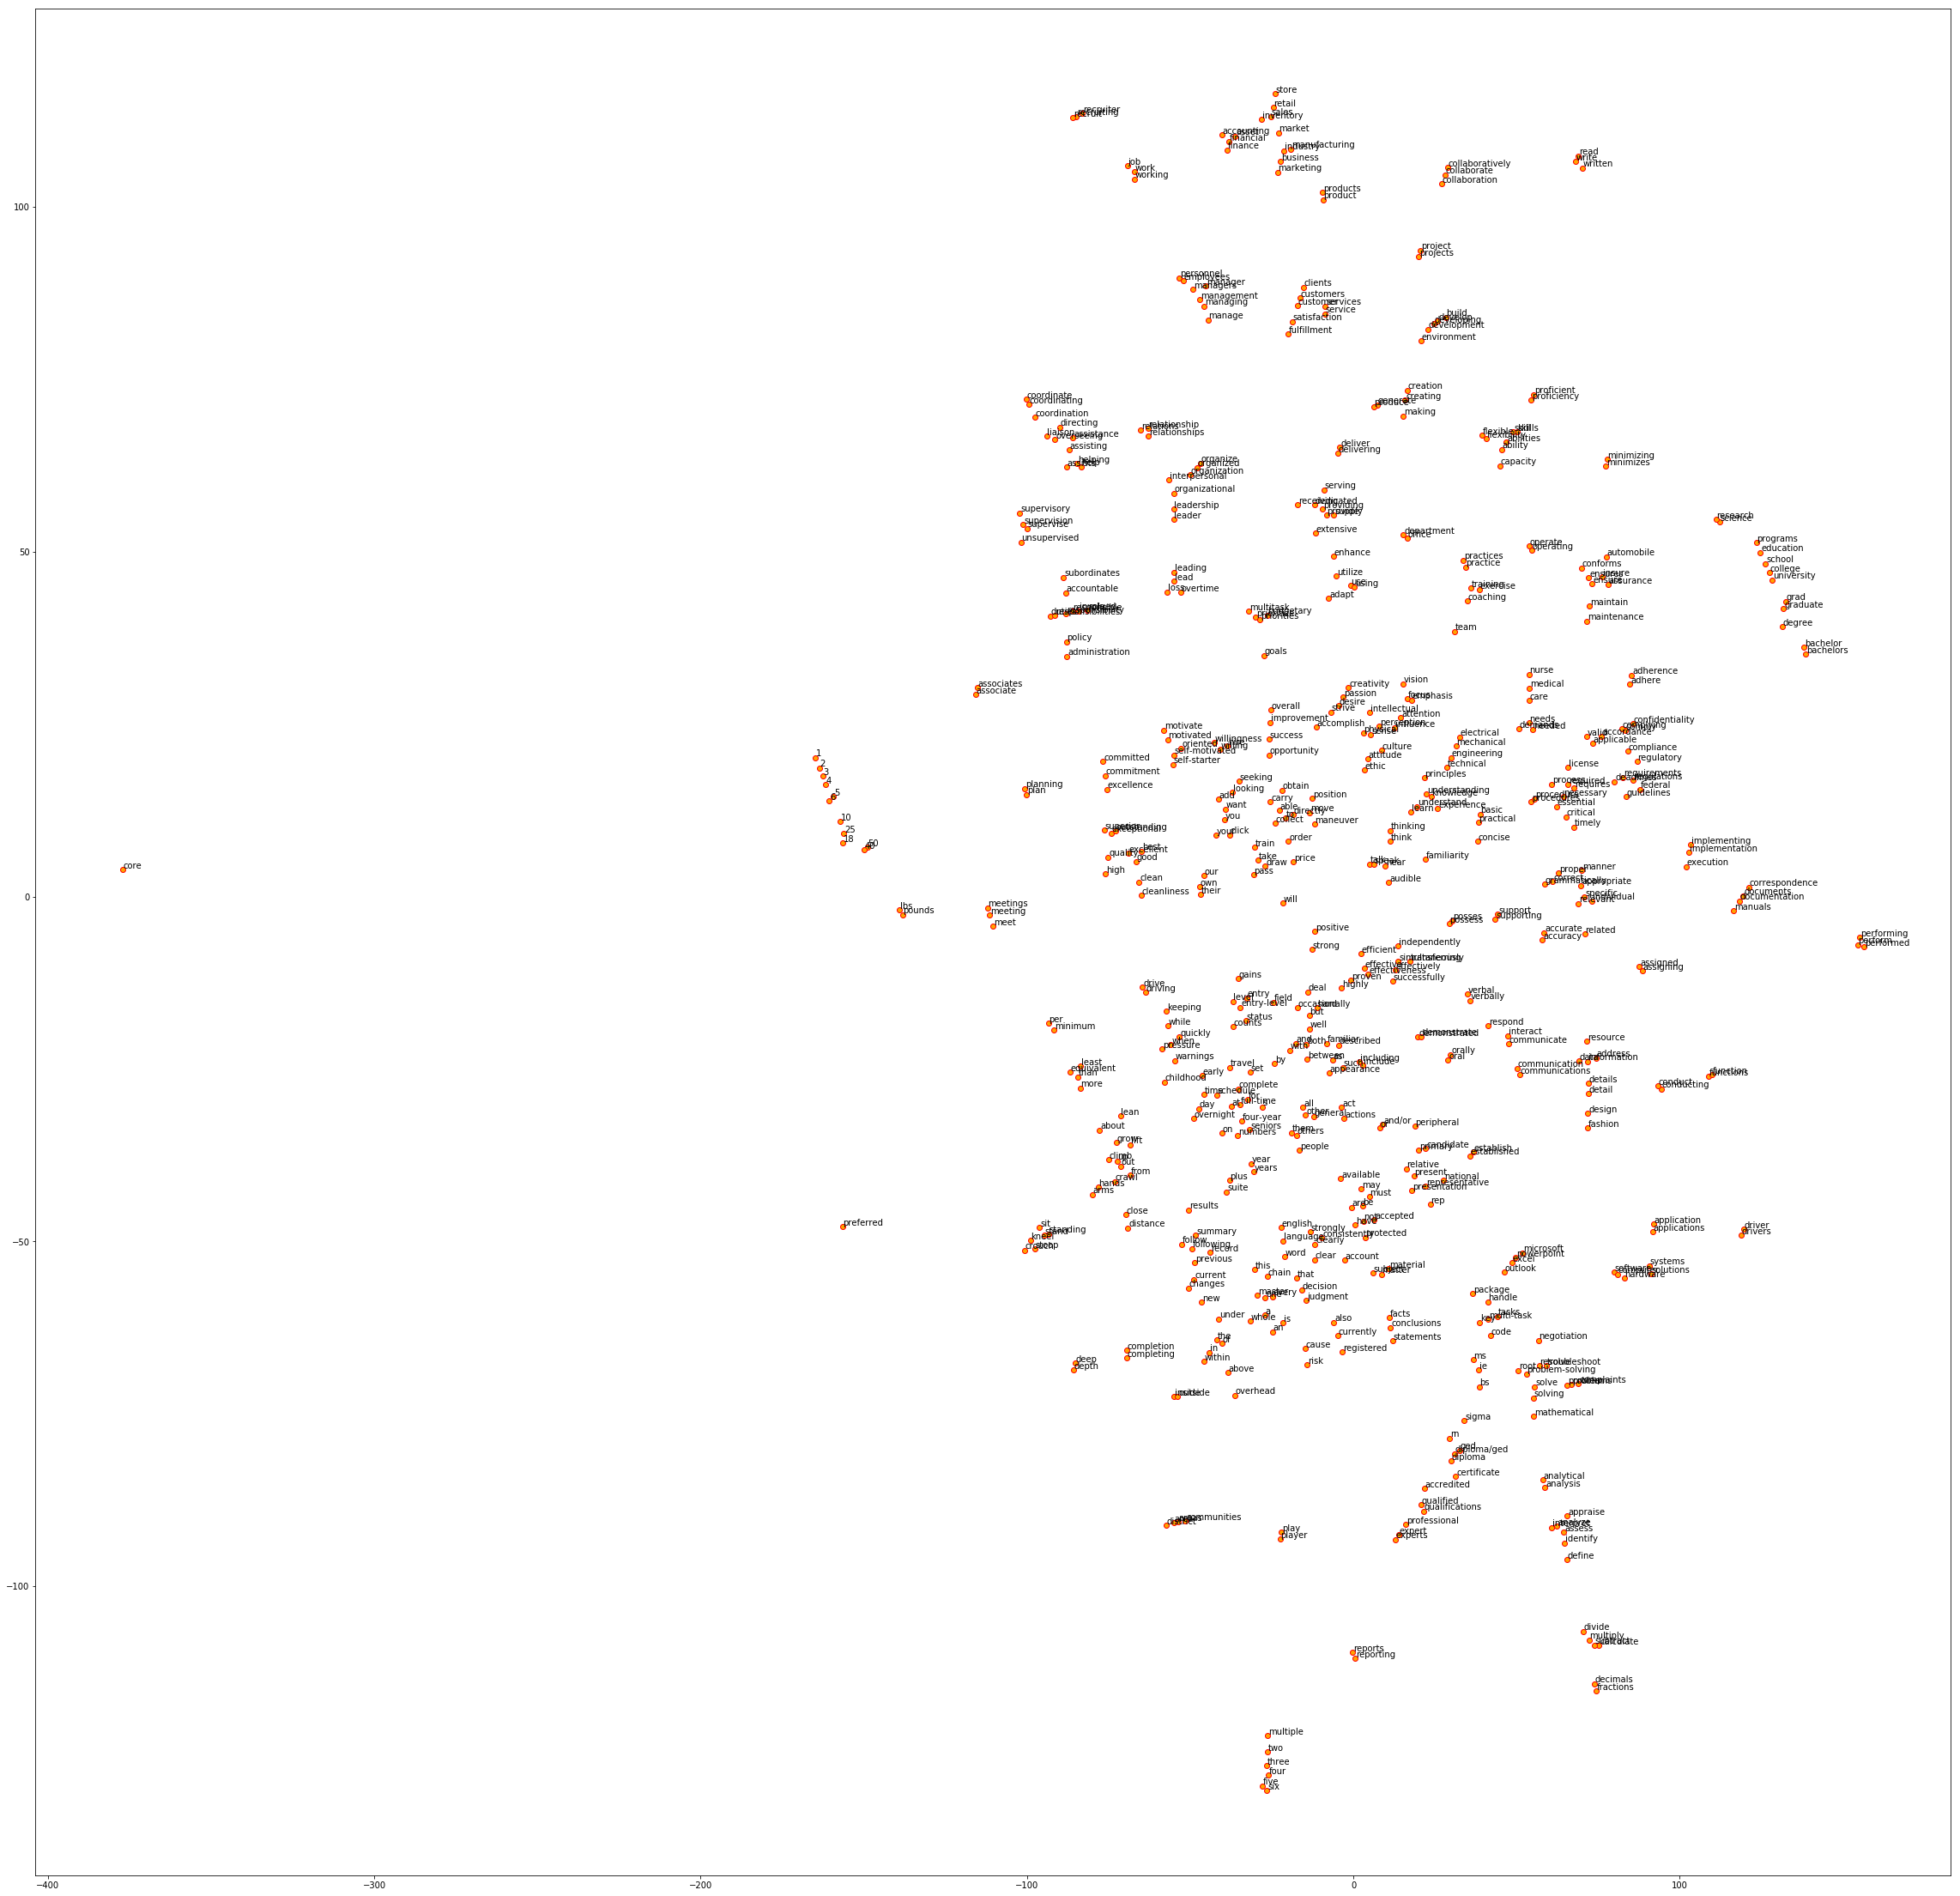

In [60]:

plt.figure(figsize=(40, 40))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+.2,y+.2))
plt.savefig('text.png')

In [59]:
plt.savefig('text.png')

<Figure size 432x288 with 0 Axes>

In [9]:
T

array([[  -9.112387 ,  -36.549362 ],
       [ -49.78143  , -128.24875  ],
       [ -15.207412 ,  -18.843588 ],
       ...,
       [  21.642004 ,   22.609087 ],
       [  38.953434 ,  -32.13557  ],
       [ -74.05461  ,    3.6897073]], dtype=float32)

In [44]:
fun = []
one= []
two=[]
for i,z in T:
    al = [i,z]
    one.append(i)
    two.append(z)
    fun.append(al)

In [45]:
fun2 = []
for i,z in zip(fun, labels):
    al = [i,z]
    fun2.append(al)

In [46]:
df2 = pd.DataFrame(fun2)

In [47]:
df2['one'] = pd.Series(one)
df2['two'] = pd.Series(two)

In [48]:
df2.sort_values(by=['one','two'])

,0,1,one,two
218,"[-377.08014, 3.8669794]",core,-377.080139,3.866979
555,"[-164.89552, 20.130081]",1,-164.895523,20.130081
549,"[-163.62718, 18.6697]",2,-163.627182,18.669701
181,"[-162.62051, 17.459179]",3,-162.620514,17.459179
297,"[-161.7075, 16.187525]",4,-161.707504,16.187525
198,"[-160.5982, 13.877141]",6,-160.598206,13.877141
455,"[-159.24913, 14.473006]",5,-159.249130,14.473006
374,"[-157.1125, 10.90997]",10,-157.112503,10.909970
121,"[-156.50906, 7.7665553]",18,-156.509064,7.766555
330,"[-156.49892, -47.856644]",preferred,-156.498917,-47.856644


In [106]:
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
km = KMeans(n_clusters=12, random_state=0)
km.fit_transform(T)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
df3 = pd.concat([df2, cluster_labels], axis=1)

In [107]:
df3.sort_values(by='ClusterLabel')

,0,1,one,two,ClusterLabel
323,"[-115.31693, 37.896656]",meetings,-115.316933,37.896656,0
422,"[-90.689476, -0.61047274]",within,-90.689476,-0.610473,0
137,"[-133.93178, 76.29562]",preferred,-133.931778,76.295624,0
133,"[-53.119183, -2.5155077]",schedule,-53.119183,-2.515508,0
519,"[-66.21089, -9.394873]",year,-66.210892,-9.394873,0
128,"[-114.17426, 37.68533]",meeting,-114.174263,37.685329,0
332,"[-64.944496, -0.9735546]",team,-64.944496,-0.973555,0
119,"[-69.5692, 28.362896]",more,-69.569199,28.362896,0
109,"[-51.43627, 2.9948537]",s,-51.436272,2.994854,0
527,"[-71.32448, 10.717613]",status,-71.324478,10.717613,0


In [100]:
mask0 = (df3['ClusterLabel'] == 0)
mask1 = (df3['ClusterLabel'] == 1)
mask2 = (df3['ClusterLabel'] == 2)
mask3 = (df3['ClusterLabel'] == 3)
mask4 = (df3['ClusterLabel'] == 4)
mask5 = (df3['ClusterLabel'] == 5)
mask6 = (df3['ClusterLabel'] == 6)
mask7 = (df3['ClusterLabel'] == 7)
mask8 = (df3['ClusterLabel'] == 8)
mask9 = (df3['ClusterLabel'] == 9)

In [101]:
print(df3[mask0][1])

13     accomplish  
24     sense       
28     that        
43     include     
48     general     
52     superior    
59     emphasis    
65     talk        
79     culture     
81     influence   
82     creativity  
85     described   
88     price       
96     others      
99     candidate   
101    learn       
106    act         
130    english     
132    such        
147    also        
149    rep         
152    focus       
154    deal        
155    presentation
156    cleanliness 
166    cause       
169    attitude    
173    best        
183    strive      
190    good        
       ...         
424    this        
428    word        
429    with        
431    people      
436    including   
443    intellectual
455    them        
458    language    
459    hard        
466    vision      
472    outstanding 
474    positive    
482    committed   
489    quality     
498    audible     
507    clean       
517    strongly    
524    between     
526    experience  


In [96]:
print(df3[mask1][1])

15     peripheral  
28     that        
43     include     
48     general     
58     are         
65     talk        
71     whole       
83     available   
85     described   
88     price       
96     others      
99     candidate   
101    learn       
106    act         
107    one         
130    english     
132    such        
134    play        
141    accepted    
147    also        
149    rep         
154    deal        
155    presentation
156    cleanliness 
162    every       
166    cause       
170    master      
173    best        
178    receiving   
181    may         
      ...          
408    concise     
411    and/or      
424    this        
428    word        
429    with        
431    people      
435    player      
436    including   
455    them        
458    language    
459    hard        
474    positive    
476    subject     
495    facts       
498    audible     
505    be          
507    clean       
517    strongly    
524    between     


In [97]:
print(df3[mask2][1])

0      maintain       
12     needed         
13     accomplish     
18     demands        
24     sense          
39     exercise       
45     adhere         
49     conforms       
59     emphasis       
66     relevant       
79     culture        
80     ensure         
81     influence      
82     creativity     
86     needs          
97     accuracy       
108    process        
112    individual     
129    guidelines     
135    essential      
146    applicable     
152    focus          
153    requires       
160    valid          
169    attitude       
172    necessary      
176    procedures     
177    practice       
182    assurance      
183    strive         
        ...           
360    medical        
379    maintenance    
394    coaching       
425    compliance     
433    insure         
443    intellectual   
444    grammatically  
450    regulations    
452    automobile     
453    care           
457    minimum        
466    vision         
471    comp

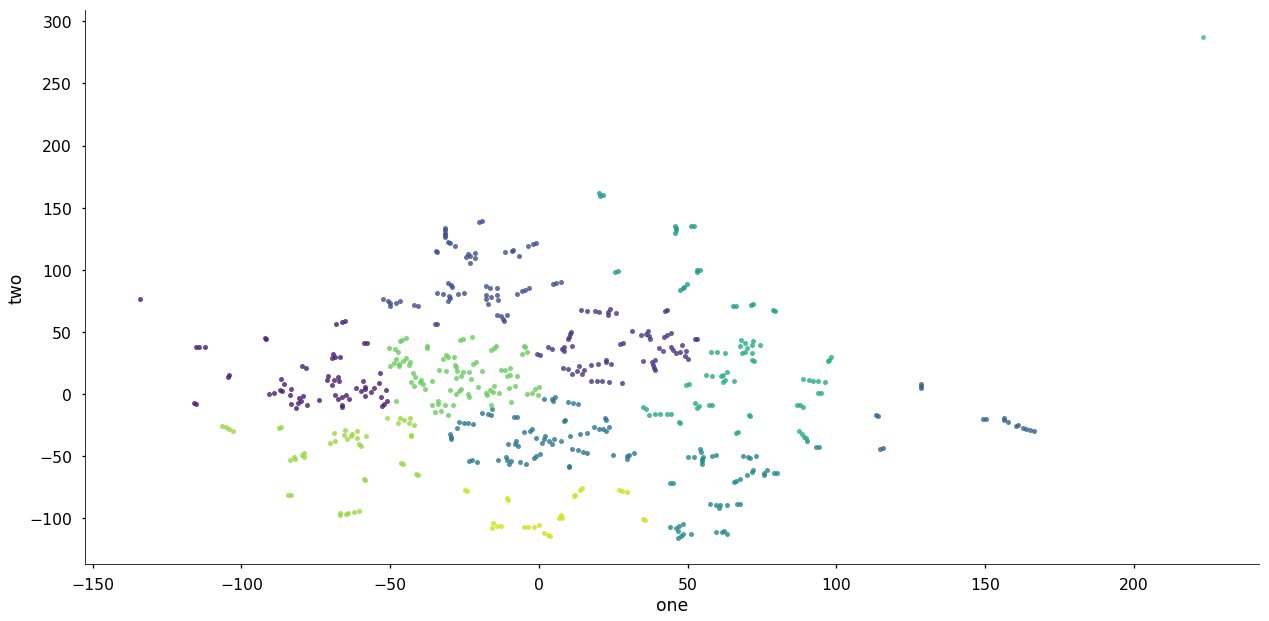

In [108]:
import seaborn as sns
sns.set_context("talk",font_scale=1.2) #talk is a preset style for projection based talks/presentations, adjusting font scale because adjusting aspect ratio below made it too small to read.

ax = sns.lmplot('one', # Horizontal axis
                'two', # Vertical axis
                data=df3, # Data source
                fit_reg=False, # Don't fix a regression line
                size = 9, #adjusting the size of the figure
                aspect =2, #adjusting the aspect ratio of the figure
                hue="ClusterLabel", #loading in the clusters
                palette = "viridis", #Color of points
                markers=".", #Diamond shows color the best
                scatter_kws={"s": 100},
                legend = False) # size and dimension


def label_point(x, y, val, ax): #function to add point labels to the graph
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.009, point['y'], str(point['val'])) #the +int is the drift of the text from the point, needs to be changed based on scale of data!

#label_point(df2['one'], df2['two'], df2[1], plt.gca())


In [31]:
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [34]:
trace = go.Scatter(
    x = df2['one'],
    y = df2['two'],
    mode = 'markers'
)

data = [trace]

iplot(data, filename='basic-scatter')

In [144]:

doc = nlp(u"multitasking and diligence are similar. Communication and service aren't.")

multitasking = doc[0]
diligence = doc[2]
Communication = doc[6]
service = doc[8]

print("multitasking <-> diligence", multitasking.similarity(diligence))
print("Communication <-> service", Communication.similarity(service))
print(multitasking.has_vector, diligence.has_vector, Communication.has_vector, service.has_vector)

multitasking <-> diligence 0.43407774
Communication <-> service 0.4958865
True True True True


In [6]:
files = pd.read_csv('./NGramsModel.csv')
all_files = files['Ngram']
labels = files['Final for Model']

In [13]:
print(list(all_files))

['all other duties', 'a manufacturing environment', 'qualified individual with', 'changes and conducting', '6 years of', 'to help them', 'knowledge of current', 'looking to hire', 'the liaison between', 'reports directly to', 'level outside sales', 'work is performed', 'assists with the', 'well as other', 'must be available', 'and training train', 'to help our', 'and marketing team', 'as the liaison', 'store inventory including', 'conducting product counts', 'plus but not', ' entry level', 'to 25 pounds', 'transferring completing price', 'department at click', 'opportunity to work', 'you are an', 'more than 40', 'at least 18', 'a computer as', 'required knowledge of', 'services and solutions', 'completing price changes', 'will be the', 'summary responsible for', 'the application process', 'above statements are', 'to grow and', 'least 18 years', 'and ensure that', 'currently seeking an', 'and maintain the', 'role will be', 'and regulatory requirements', 'required to work', 'counts perfo

In [4]:
vectorizer = CountVectorizer(analyzer ='word')

TDM = vectorizer.fit_transform(all_files)
TDM = TDM.toarray()
print(TDM[1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [8]:
print(TDM[10])
print(all_files[10])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [9]:
print(TDM[33])
print(all_files[33])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [17]:
train, test, train_labels, test_labels = train_test_split(TDM,labels,test_size=0.33, random_state=42)

In [18]:
classifiers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
models = []

for clf in classifiers:
    Logistic_classifier = LogisticRegression(solver=clf)
    Logistic_classifier.fit(train, train_labels)
    score = Logistic_classifier.score(test, test_labels)
    predictions = Logistic_classifier.predict(test)
    models.append([clf, score, predictions, Logistic_classifier.predict_proba(test), precision_score(predictions, test_labels),recall_score(predictions, test_labels),f1_score(predictions, test_labels)])
    print(clf)
    print(score)
    print(predictions[:6])
    print(Logistic_classifier.predict_proba(test)[:6])
    print("Precision, recall, and F1 were:")
    print(precision_score(predictions, test_labels))
    print(recall_score(predictions, test_labels))
    print(f1_score(predictions, test_labels))  

newton-cg
0.8338461538461538
[0 0 0 1 0 0]
[[0.88058431 0.11941569]
 [0.76956307 0.23043693]
 [0.74209868 0.25790132]
 [0.36631968 0.63368032]
 [0.75286115 0.24713885]
 [0.85576209 0.14423791]]
Precision, recall, and F1 were:
0.8100558659217877
0.8787878787878788
0.8430232558139535
lbfgs
0.8338461538461538
[0 0 0 1 0 0]
[[0.88058866 0.11941134]
 [0.76954428 0.23045572]
 [0.74208403 0.25791597]
 [0.36632577 0.63367423]
 [0.75286188 0.24713812]
 [0.85575065 0.14424935]]
Precision, recall, and F1 were:
0.8100558659217877
0.8787878787878788
0.8430232558139535
liblinear
0.8338461538461538
[0 0 0 1 0 0]
[[0.87976518 0.12023482]
 [0.76810876 0.23189124]
 [0.74073244 0.25926756]
 [0.36547429 0.63452571]
 [0.7501682  0.2498318 ]
 [0.85608107 0.14391893]]
Precision, recall, and F1 were:
0.8100558659217877
0.8787878787878788
0.8430232558139535
sag
0.8338461538461538
[0 0 0 1 0 0]
[[0.88059293 0.11940707]
 [0.769592   0.230408  ]
 [0.74210897 0.25789103]
 [0.36634255 0.63365745]
 [0.75286737 0.247

In [99]:
'''because this is a small dataset (comparitively) the model "types" converged on the same numbers'''

'because this is a small dataset (comparitively) the model "types" converged on the same numbers'

In [19]:
score = Logistic_classifier.score(TDM, labels)

In [20]:
print(score)

0.9063136456211812


In [21]:
predictions = Logistic_classifier.predict(TDM)
print(predictions)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 0 1 1 

In [7]:
models[0][2]

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,

In [8]:
train, test, train_labels, test_labels = train_test_split(all_files,labels,test_size=0.33, random_state=0)
#this will show the text of what is in our test files, this is because we set random state to 0 in both, so it is pulling from the same randomizer.

In [22]:
Sorted_values_all = sorted(zip(predictions, all_files ,labels))

In [23]:
Sorted_values_all

[(0, ' bachelor s', 0),
 (0, ' bachelors degree', 0),
 (0, ' customer service', 0),
 (0, ' demonstrated ability', 0),
 (0, ' entry level', 0),
 (0, ' experience working', 0),
 (0, ' familiarity with', 0),
 (0, ' high school', 0),
 (0, ' working knowledge', 0),
 (0, '10 years experience', 0),
 (0, '18 years of', 0),
 (0, '3 years of', 0),
 (0, '4 year degree', 0),
 (0, '5 years experience', 0),
 (0, '50 pounds ability', 0),
 (0, '6 years of', 0),
 (0, 'a bachelor s', 0),
 (0, 'a clear audible', 0),
 (0, 'a college or', 0),
 (0, 'a culture that', 0),
 (0, 'a customer service', 0),
 (0, 'a deep understanding', 0),
 (0, 'a degree in', 0),
 (0, 'a high school', 0),
 (0, 'a key role', 0),
 (0, 'a manufacturing environment', 0),
 (0, 'a master s', 0),
 (0, 'a professional appearance', 0),
 (0, 'a registered nurse', 0),
 (0, 'a valid driver', 0),
 (0, 'abilities ability to', 0),
 (0, 'ability to demonstrate', 0),
 (0, 'ability to drive', 0),
 (0, 'ability to exercise', 0),
 (0, 'ability to fun

In [ ]:
Sorted_values = sorted(zip(models[0][2],test,test_labels))

In [108]:
Sorted_values

[(0, ' experience working', 0),
 (0, ' high school', 0),
 (0, '10 years experience', 0),
 (0, '18 years of', 0),
 (0, 'a bachelor s', 0),
 (0, 'a degree in', 0),
 (0, 'a master s', 0),
 (0, 'a professional appearance', 0),
 (0, 'able to obtain', 0),
 (0, 'able to operate', 1),
 (0, 'able to travel', 0),
 (0, 'accounting finance or', 0),
 (0, 'administration degree business', 0),
 (0, 'all other duties', 0),
 (0, 'and managing the', 1),
 (0, 'and project management', 0),
 (0, 'and record keeping', 1),
 (0, 'and regulatory requirements', 0),
 (0, 'and talk or', 0),
 (0, 'and the general', 0),
 (0, 'appraise subordinates on', 1),
 (0, 'as liaison between', 0),
 (0, 'as needed support', 0),
 (0, 'assisting in the', 0),
 (0, 'associates degree in', 0),
 (0, 'at least 18', 0),
 (0, 'attention to details', 1),
 (0, 'business meetings ability', 1),
 (0, 'close the store', 0),
 (0, 'collect data establish', 1),
 (0, 'college degree in', 0),
 (0, 'completing price changes', 0),
 (0, 'computer sc